<a href="https://colab.research.google.com/github/FernandoSimon22/vision_artificial/blob/main/YOLOv8m_(multiclase).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Aug  9 15:32:25 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   50C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.0/1.0 MB 31.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 88.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 67.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 62.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 3.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 918, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {list(MODES)}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.11/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ['benchmark', 'train', 'predict', 'track', 'val', 'export'].

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ['segment', 'detect', 'obb', 'pose', 'classify']
                MODE (required) is one of ['benchmark', 'train', 'predict', 'track', 'val', 'export']
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
      

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="lX9sE2RPQOCv2R7cn0io")
project = rf.workspace("jota22").project("vdssdvsdv")
version = project.version(1)
dataset = version.download("yolov8")


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 86.9/86.9 kB 6.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 66.8/66.8 kB 6.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 49.9/49.9 MB 14.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.4/1.4 MB 82.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4.2/4.2 MB 116.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-h

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to vdssdvsdv-1 in yolov8:: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1134/1134 [00:00<00:00, 8421.73it/s]


In [5]:
# Script para unificar clases espec√≠ficas en archivos .txt de etiquetas YOLO
# Reemplaza: B -> burb, bbg -> Bg, D -> desp, MCu -> MdC, su -> surco, Poro -> Poro

import os
from glob import glob

# Definir el mapeo de clases antiguas (√≠ndices) a nuevas (√≠ndices unificados)
# Suponiendo el orden original en data.yaml, por ejemplo:
# 0: B, 1: Bg, 2: D, 3: MCu, 4: MdC, 5: Su, 6: bbg, 7: burb, 8: desp, 9: poro, 10: surco

class_map = {
    7: 0,  # B -> burb (√≠ndice 7)
    6: 1,  # bbg -> Bg (√≠ndice 1)
    8: 2,  # D -> desp (√≠ndice 8)
    4: 3,  # MCu -> MdC (√≠ndice 4)
    10: 5, # Su -> surco (√≠ndice 10)
    9: 9   # poro -> poro (se mantiene igual)
    # Otros √≠ndices no cambian
}

# Directorios con etiquetas
label_dirs = ["/content/Segmentacion_imagenes_AM3-6/train/labels", "/content/Segmentacion_imagenes_AM3-6/valid/labels", "/content/Segmentacion_imagenes_AM3-6/test/labels"]

def process_label_file(filepath, class_map):
    new_lines = []
    with open(filepath, 'r') as f:
        for line in f:
            parts = line.strip().split()
            class_id = int(parts[0])
            new_class_id = class_map.get(class_id, class_id)  # Usa el nuevo id si existe, sino deja igual
            parts[0] = str(new_class_id)
            new_lines.append(" ".join(parts))
    with open(filepath, 'w') as f:
        f.write("\n".join(new_lines))

# Procesar cada archivo .txt
def unify_labels():
    for folder in label_dirs:
        if not os.path.exists(folder):
            continue
        label_files = glob(os.path.join(folder, "*.txt"))
        print(f"Procesando {len(label_files)} archivos en {folder}...")
        for file in label_files:
            process_label_file(file, class_map)
    print("‚úÖ Reasignaci√≥n de clases completada.")

# Ejecutar
unify_labels()



‚úÖ Reasignaci√≥n de clases completada.


In [6]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/vdssdvsdv-1/data.yaml epochs=200, imgsz=768, batch=8, lr0=0.001, val=True

WARNING ‚ö†Ô∏è argument 'epochs=200,' does not require trailing comma ',', updating to 'epochs=200'.
WARNING ‚ö†Ô∏è argument 'imgsz=768,' does not require trailing comma ',', updating to 'imgsz=768'.
WARNING ‚ö†Ô∏è argument 'batch=8,' does not require trailing comma ',', updating to 'batch=8'.
WARNING ‚ö†Ô∏è argument 'lr0=0.001,' does not require trailing comma ',', updating to 'lr0=0.001'.
Ultralytics 8.3.176 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/vdssdvsdv-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, h

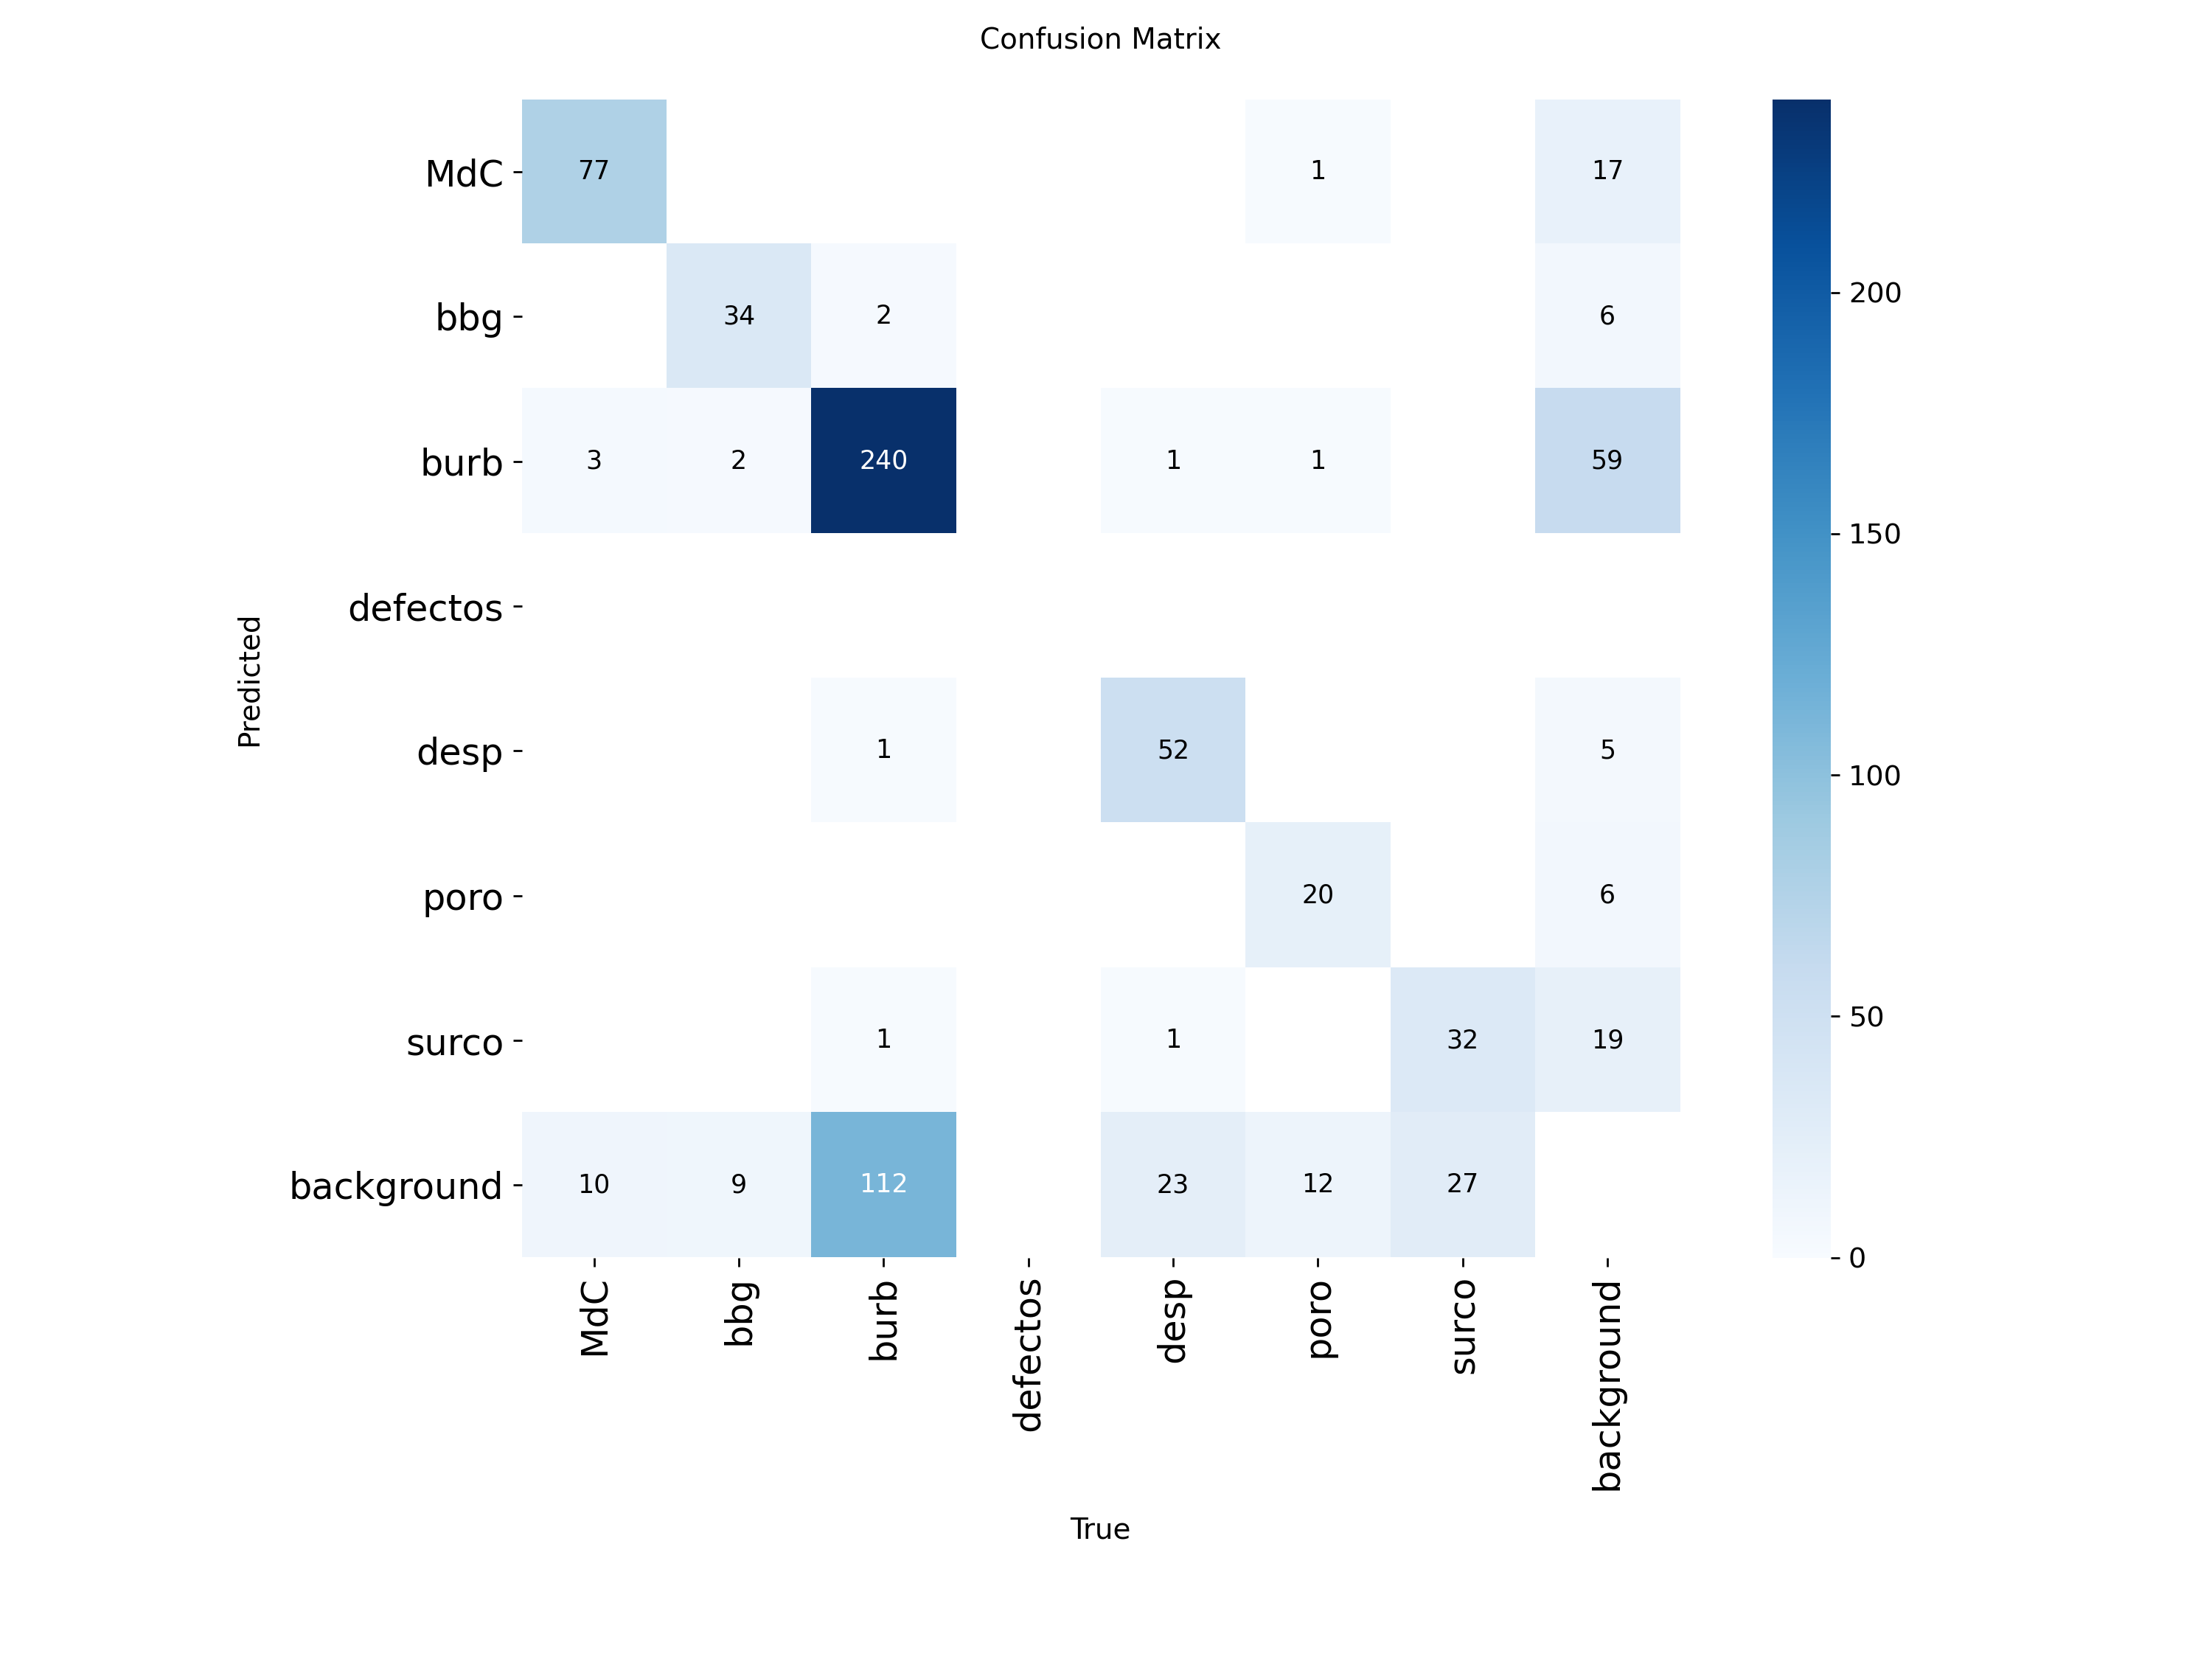

In [7]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

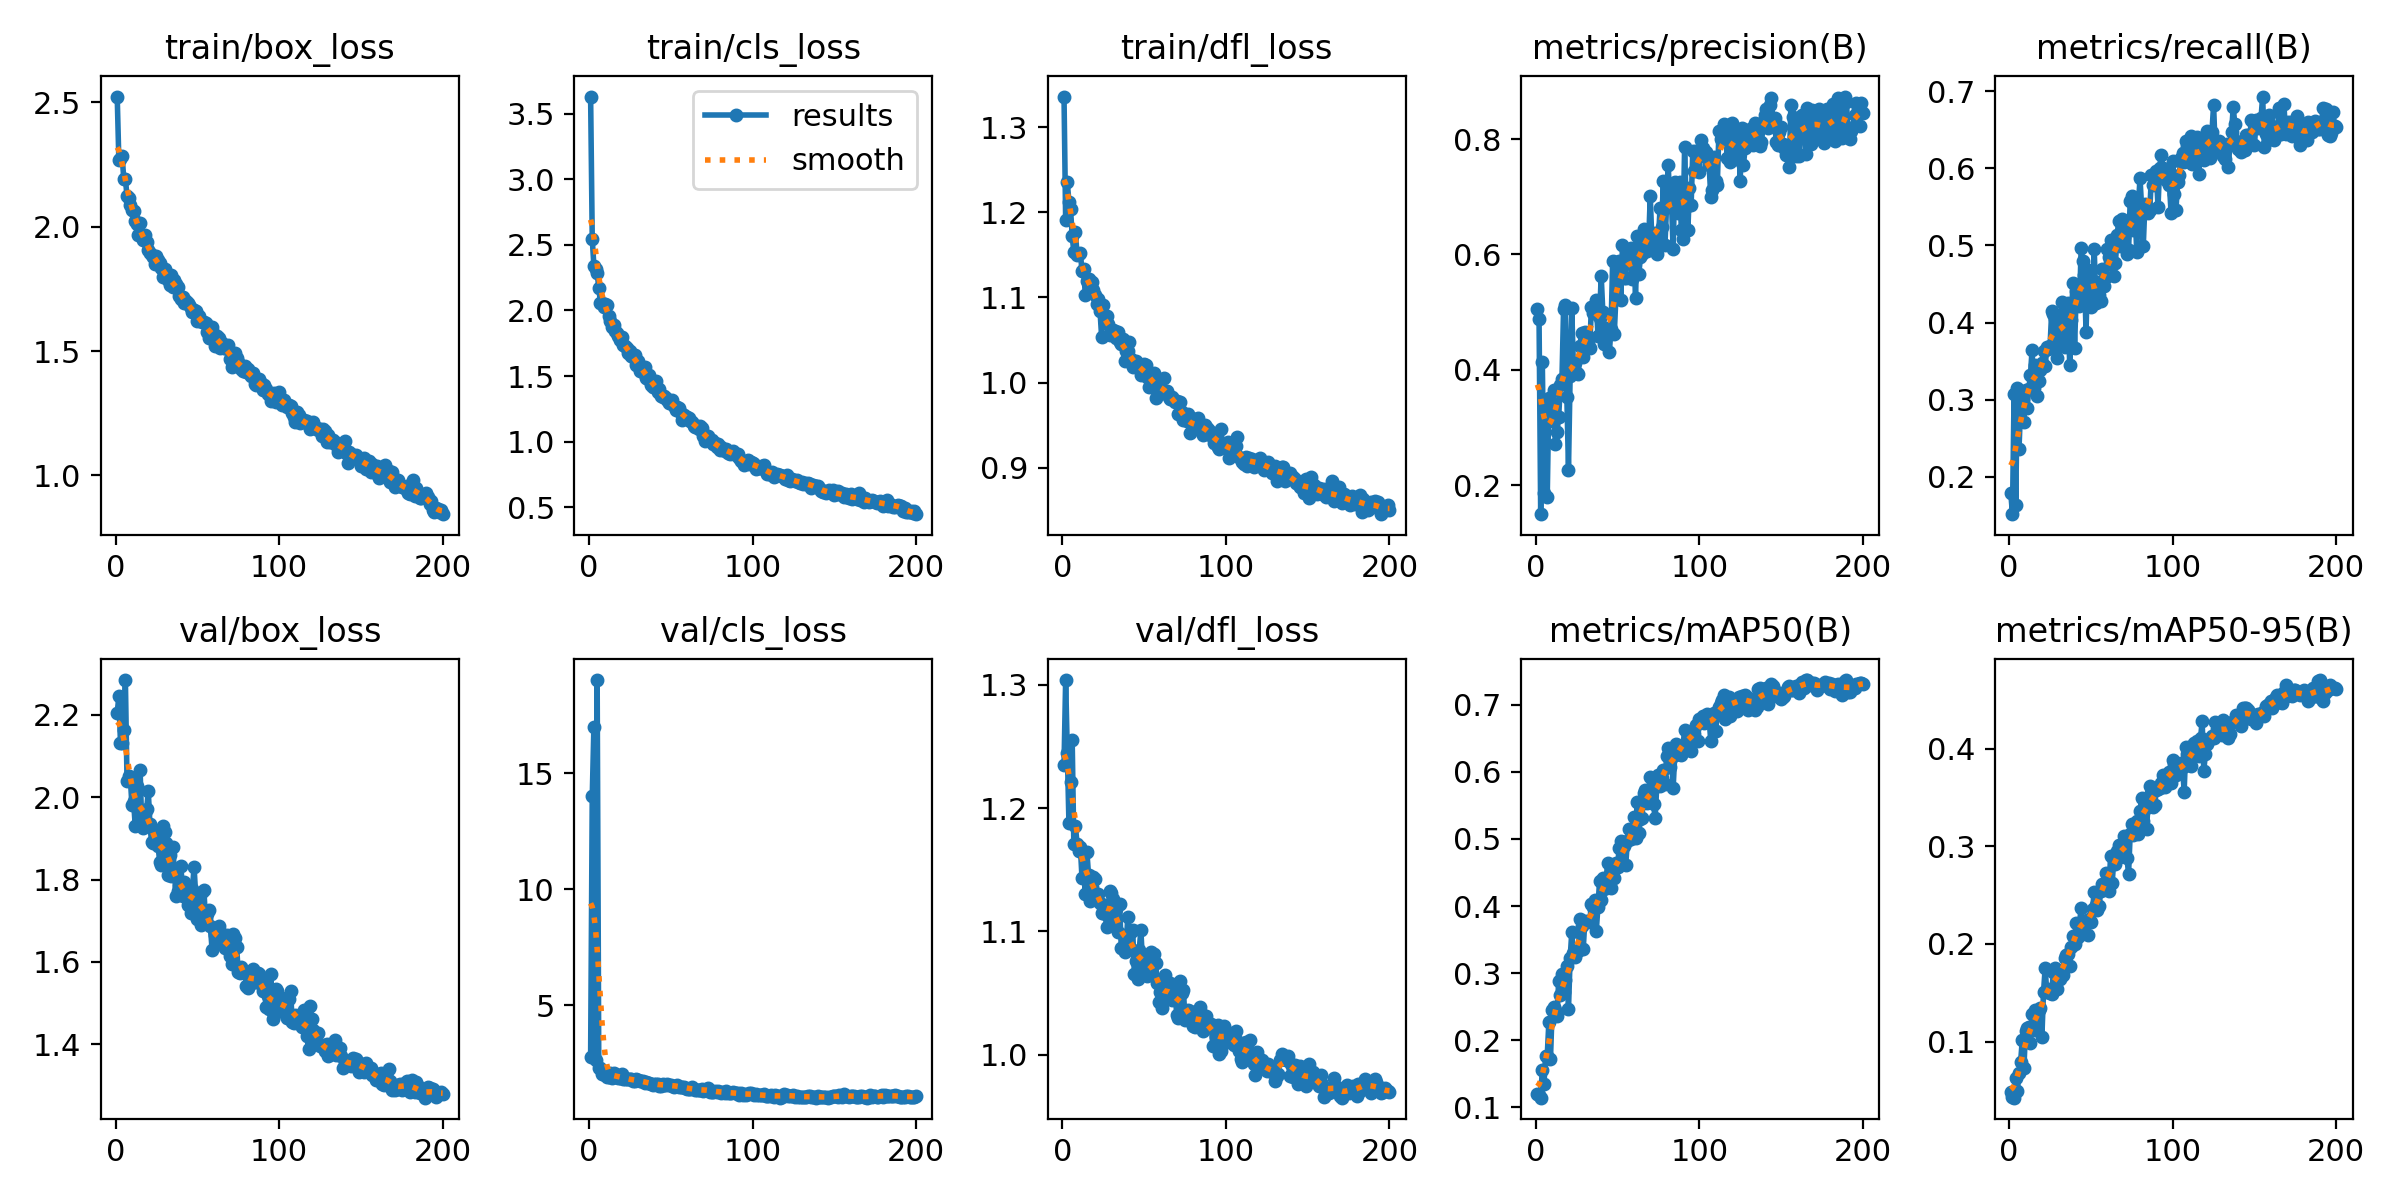

In [8]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [9]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/vdssdvsdv-1/data.yaml

Ultralytics 8.3.176 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,843,813 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 1559.9¬±541.3 MB/s, size: 38.3 KB)
val: Scanning /content/vdssdvsdv-1/valid/labels.cache... 46 images, 1 backgrounds, 0 corrupt: 100% 46/46 [00:00<?, ?it/s]
WARNING ‚ö†Ô∏è Box and segment counts should be equal, but got len(segments) = 26, len(boxes) = 661. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.03it/s]
                   all         46        661      0.866      0.649      0.738       0.47
                   MdC         23         90      0.877       0.79      0.896      0.507
                   bbg         13         45 

In [10]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source=/content/vdssdvsdv-1/test/images

Ultralytics 8.3.176 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,843,813 parameters, 0 gradients, 78.7 GFLOPs

image 1/23 /content/vdssdvsdv-1/test/images/0c80daf9-3_22_png.rf.de17e88e1a6a00391ac5591a7d8dbec8.jpg: 768x768 10 burbs, 2 desps, 47.8ms
image 2/23 /content/vdssdvsdv-1/test/images/1667c2d2-3_21_png.rf.69b94f7b38bafb494ee7b0f583743580.jpg: 768x768 1 burb, 4 desps, 40.8ms
image 3/23 /content/vdssdvsdv-1/test/images/1667c2d2-3_21_png.rf.dcd9a07bdb2ddce1e3f7976edb152d42.jpg: 768x768 1 burb, 2 desps, 40.9ms
image 4/23 /content/vdssdvsdv-1/test/images/18ce0a59-3_27_png.rf.e58999ff5df3574916ee57105c8119ce.jpg: 768x768 1 MdC, 1 bbg, 2 burbs, 3 desps, 6 surcos, 40.8ms
image 5/23 /content/vdssdvsdv-1/test/images/4834faff-3_5_png.rf.edda894d672b81245c85bcfa438a4daf.jpg: 768x768 9 burbs, 40.8ms
image 6/23 /content/vdssdvsdv-1/test/images/51527376-5_35_png.rf.42f8771dcb65a7ea07eb9b38b70d3702.jpg: 768x768 3 burbs, 3 desps, 1 poro, 4

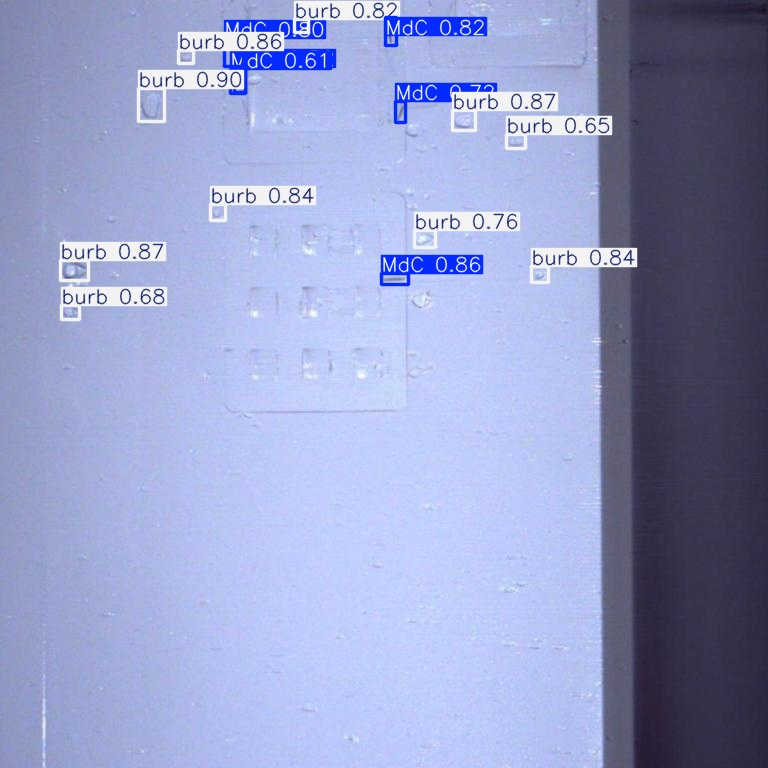

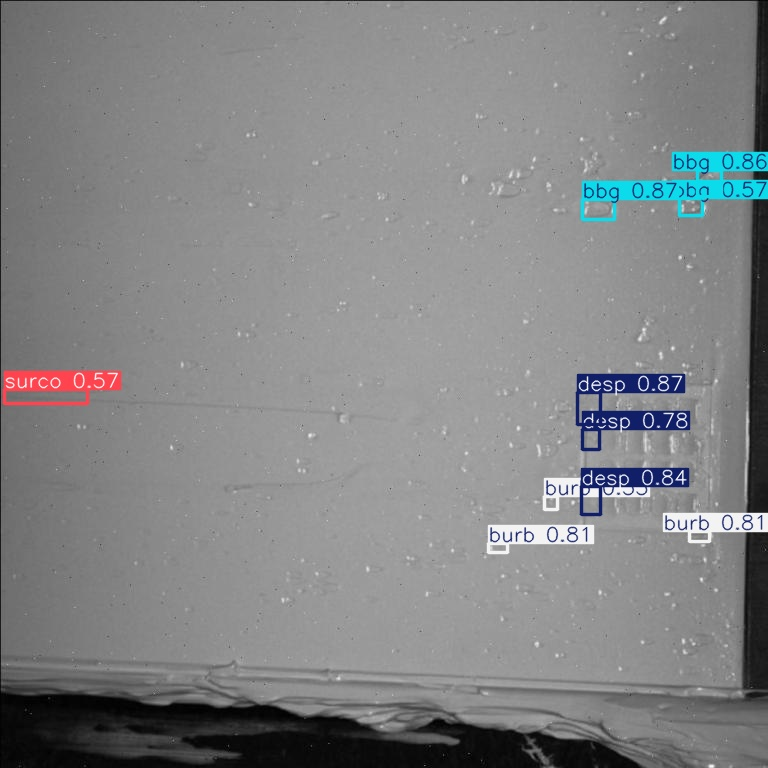

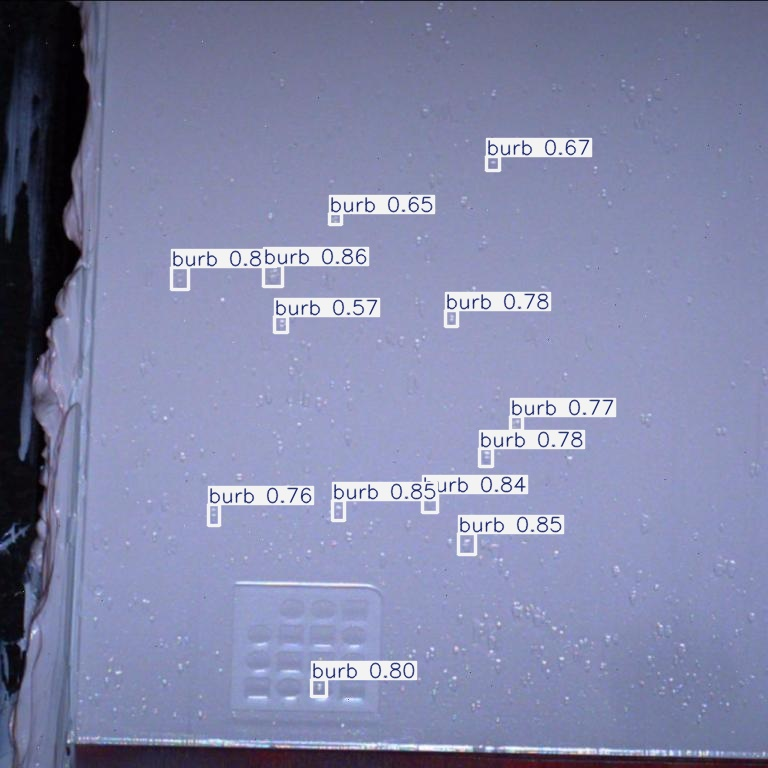

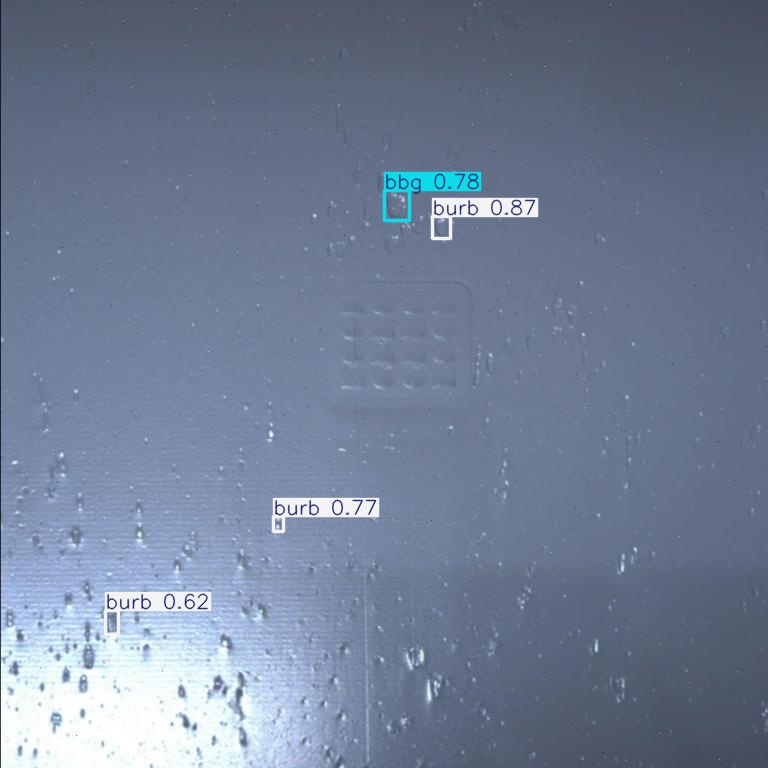

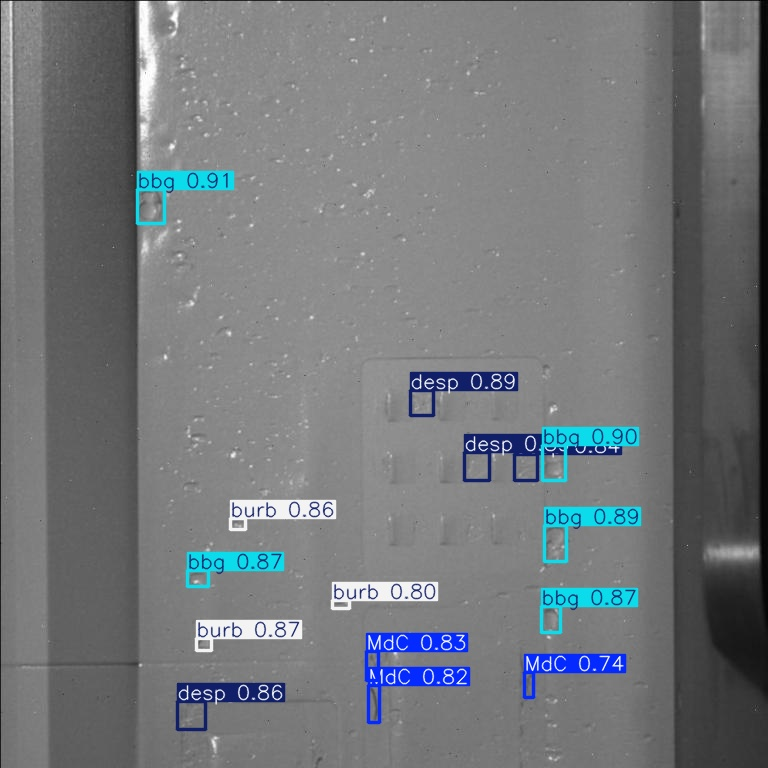

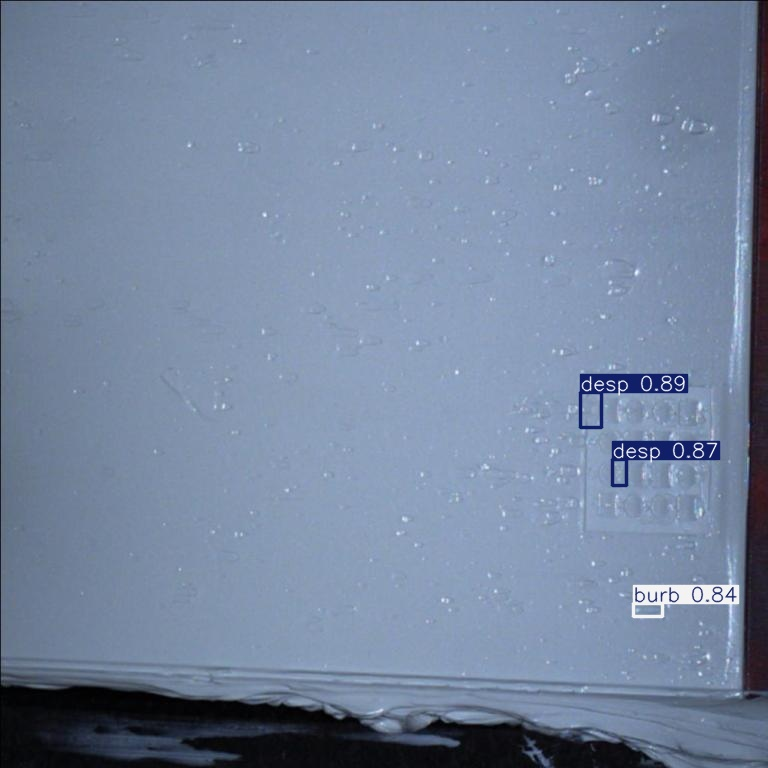

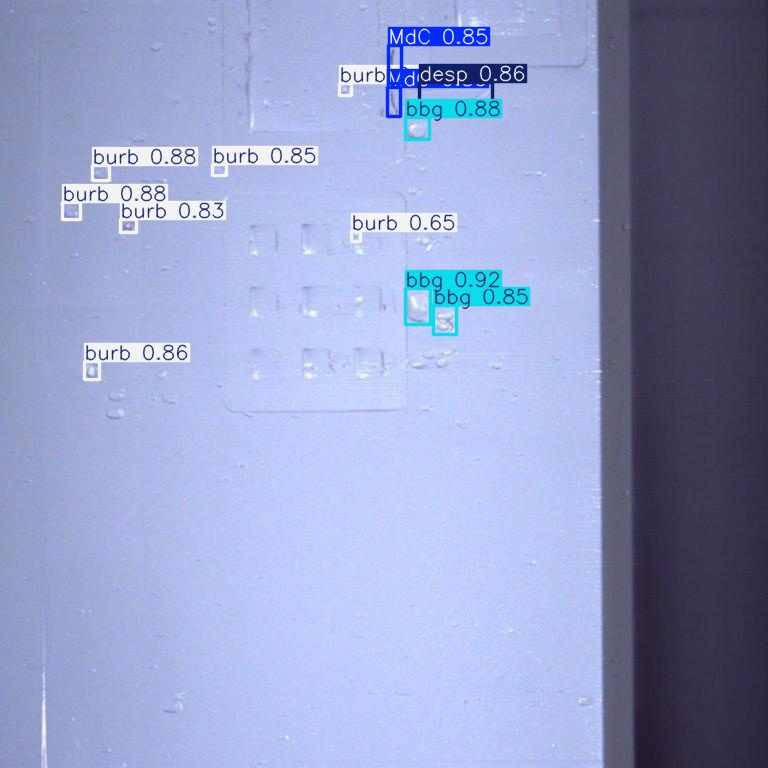

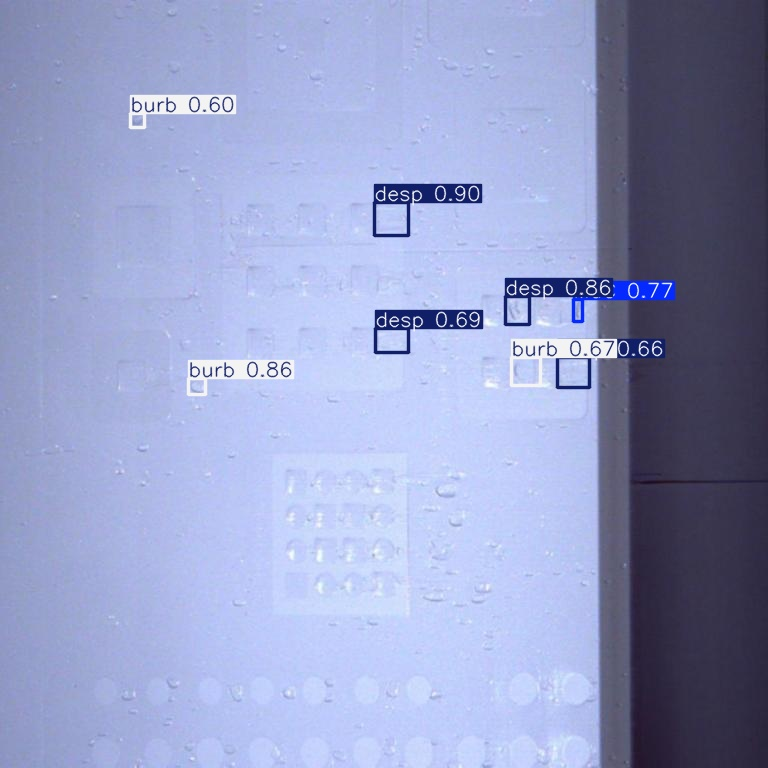

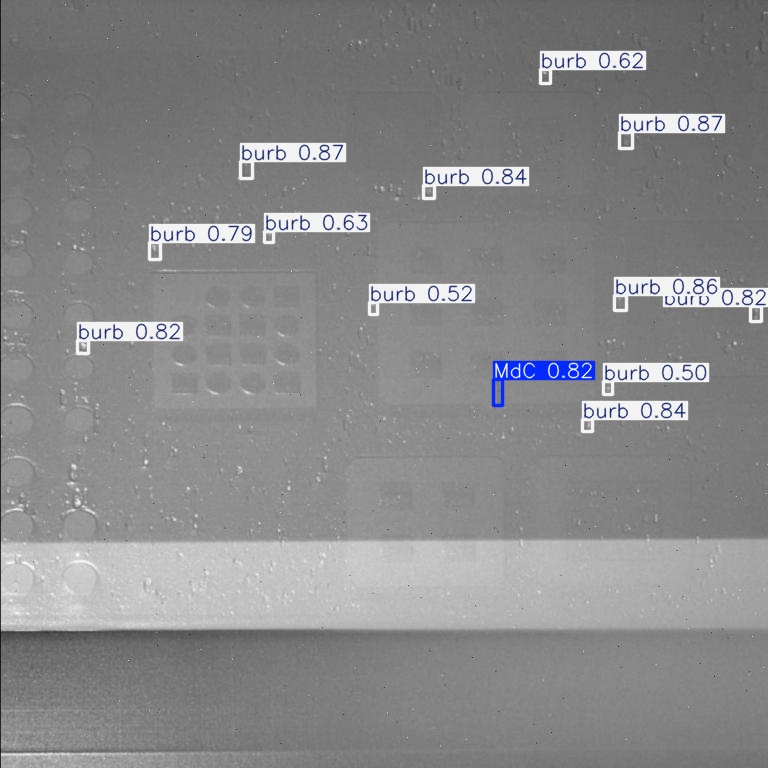

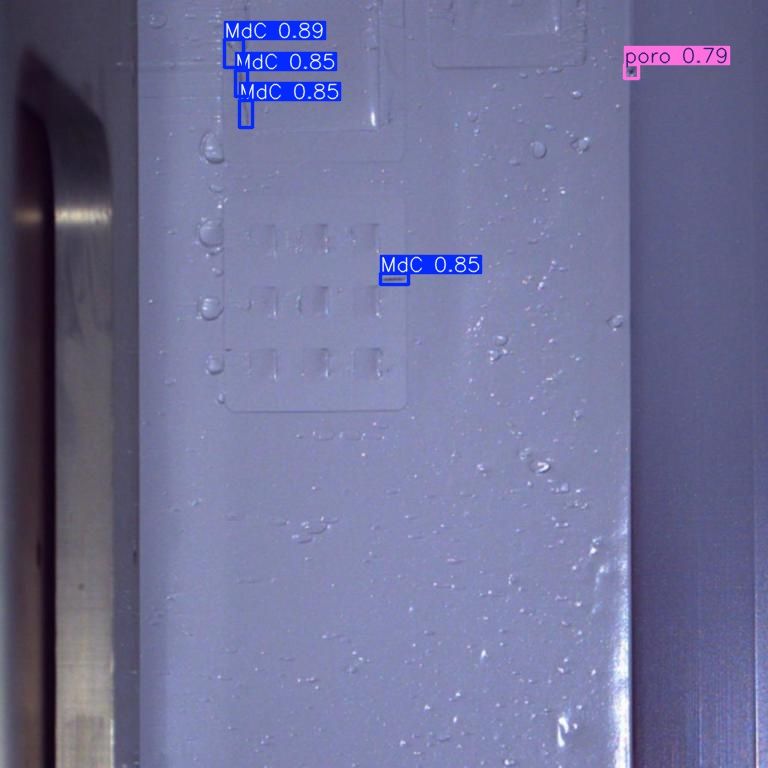

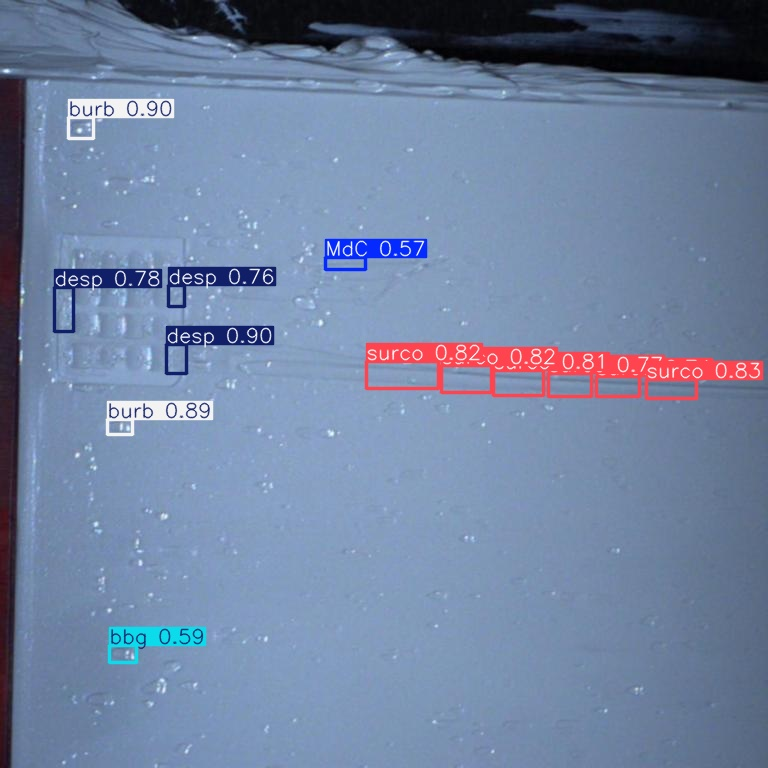

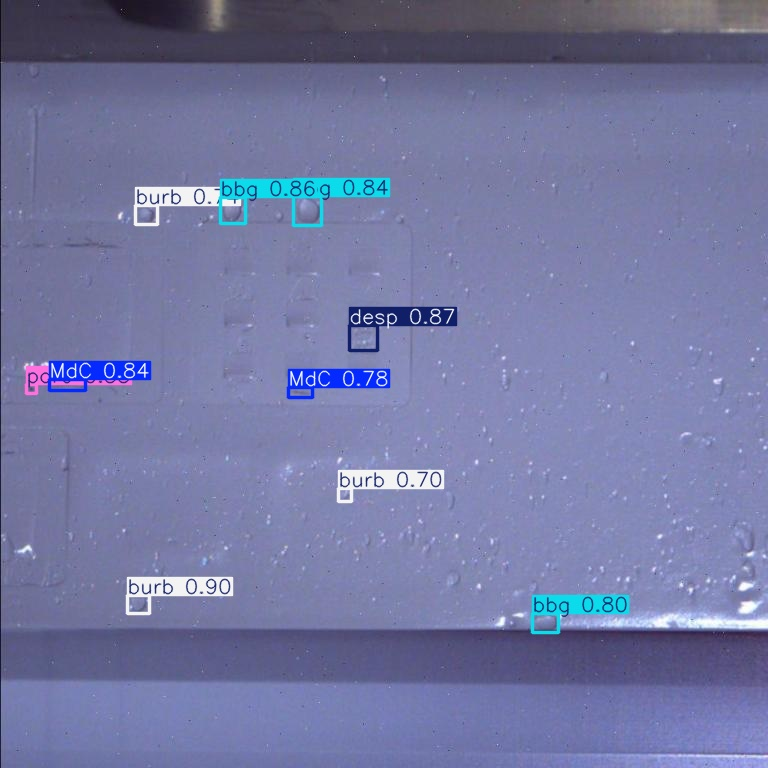

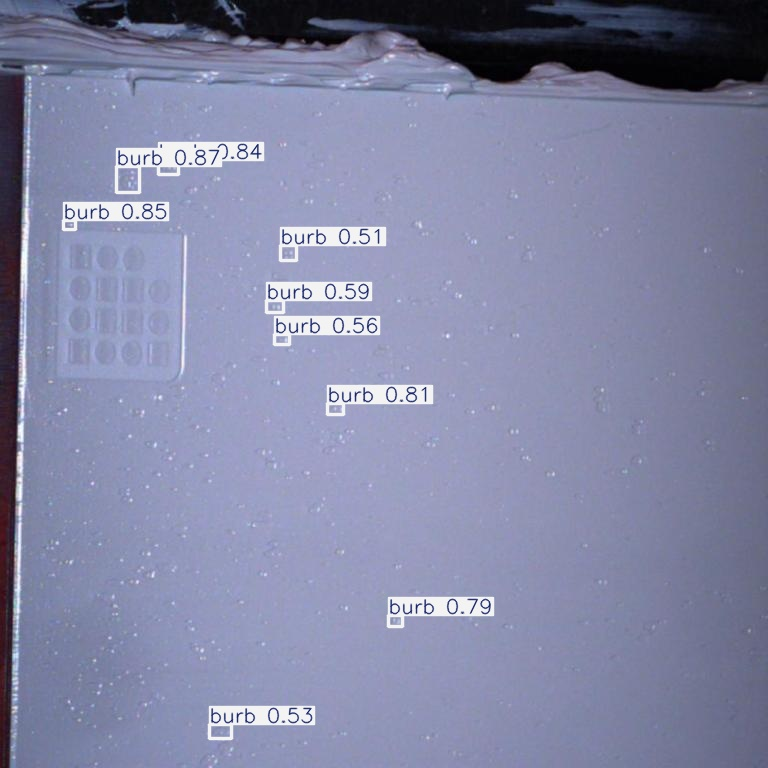

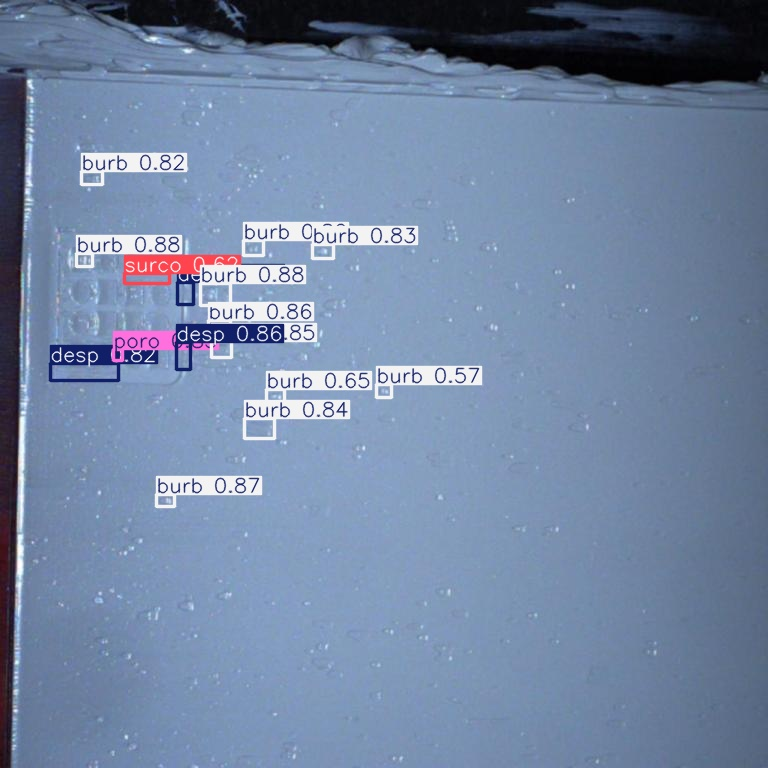

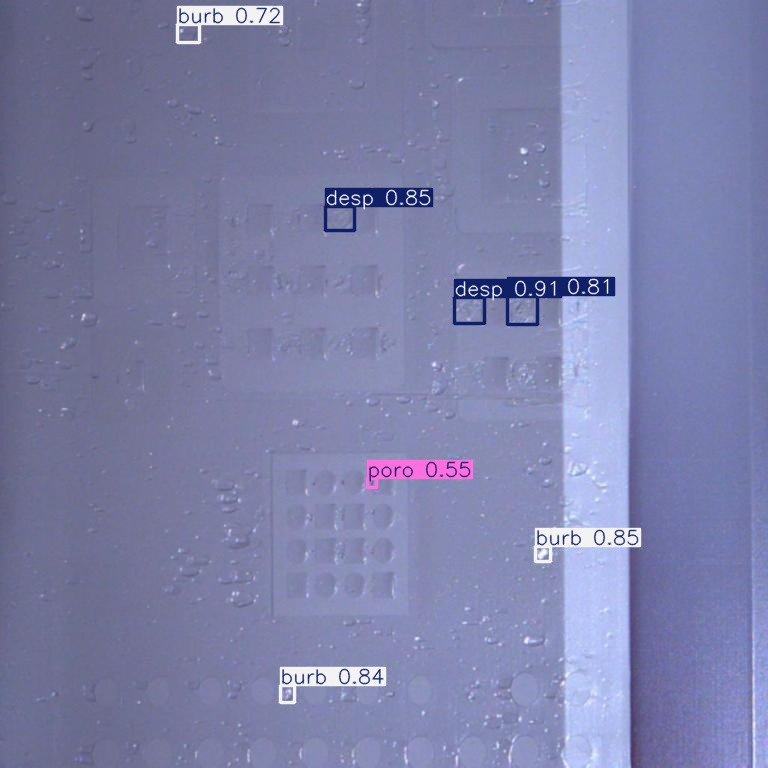

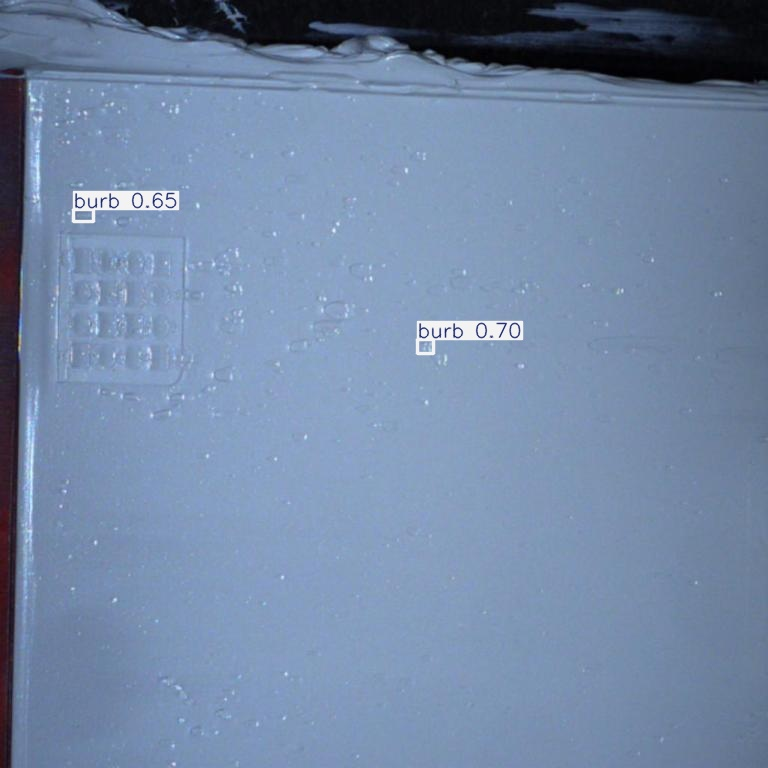

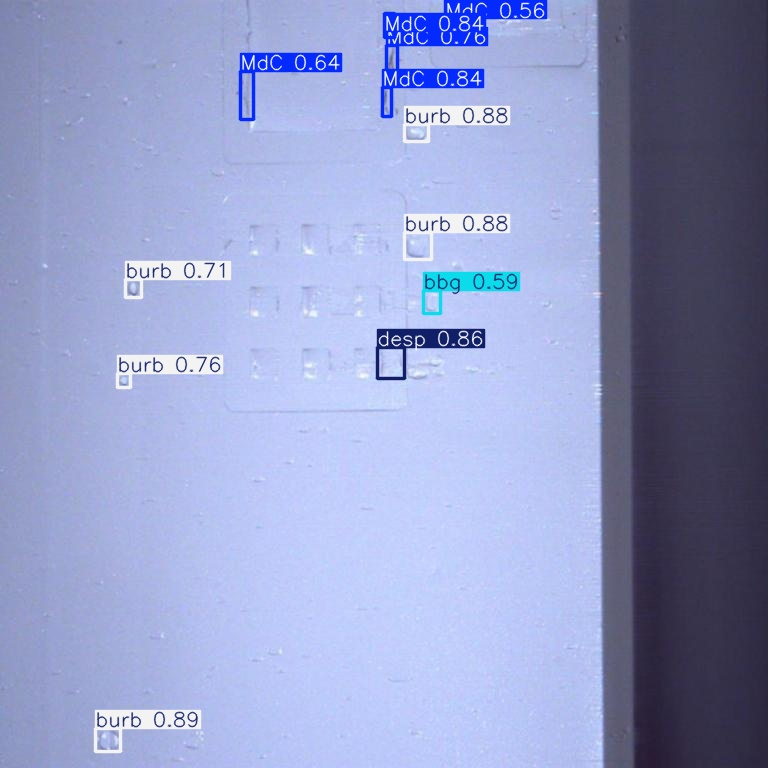

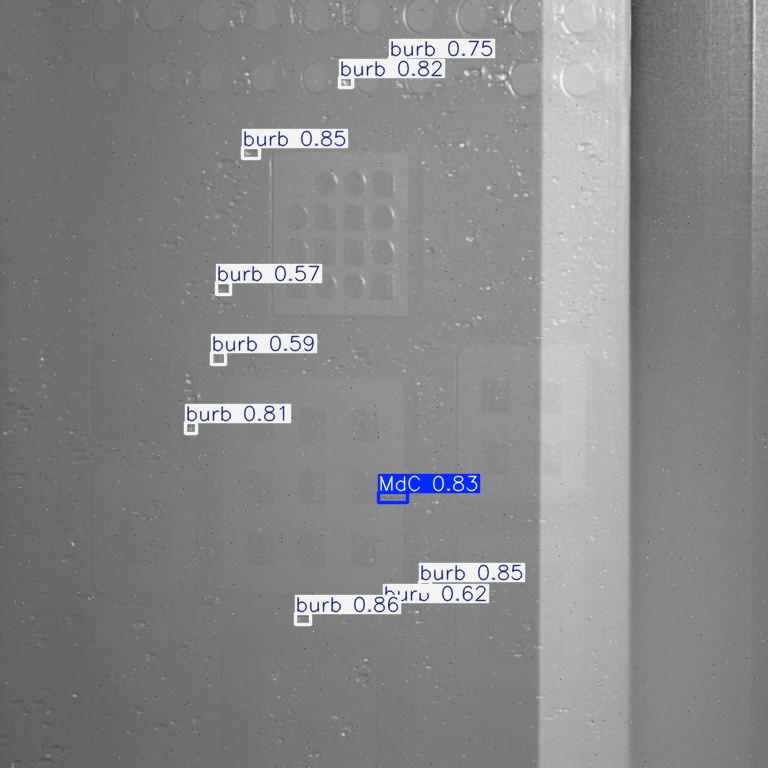

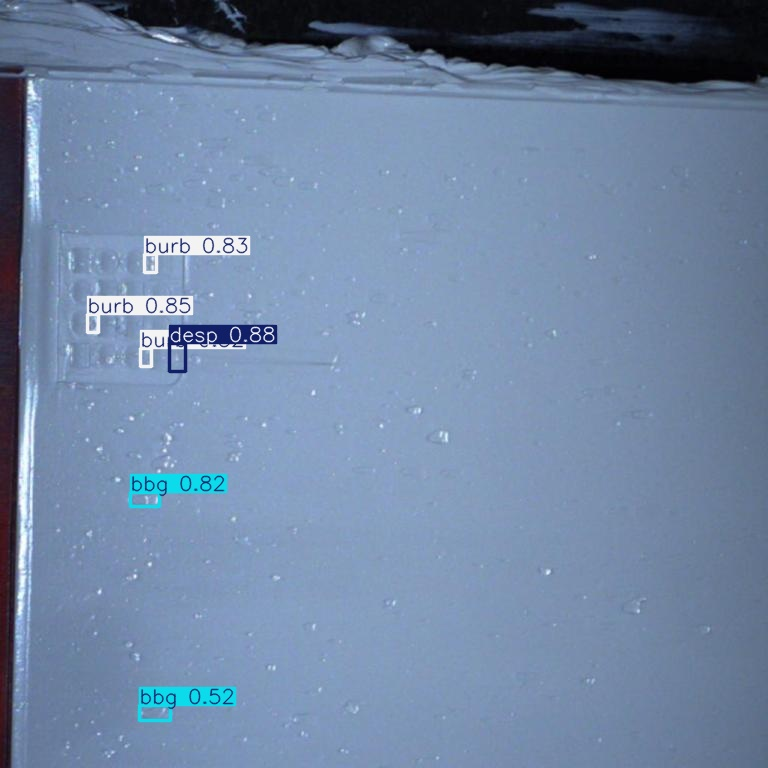

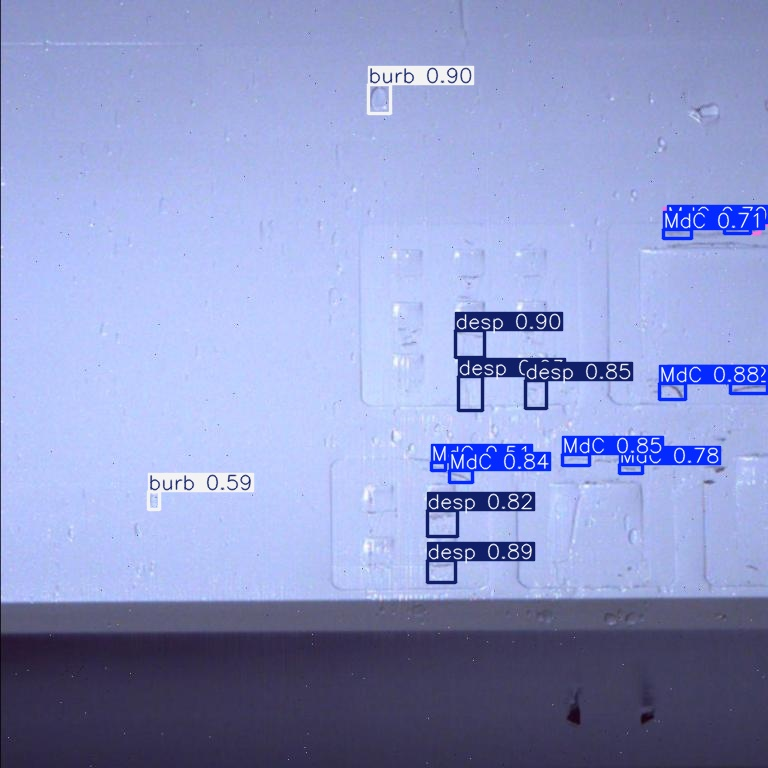

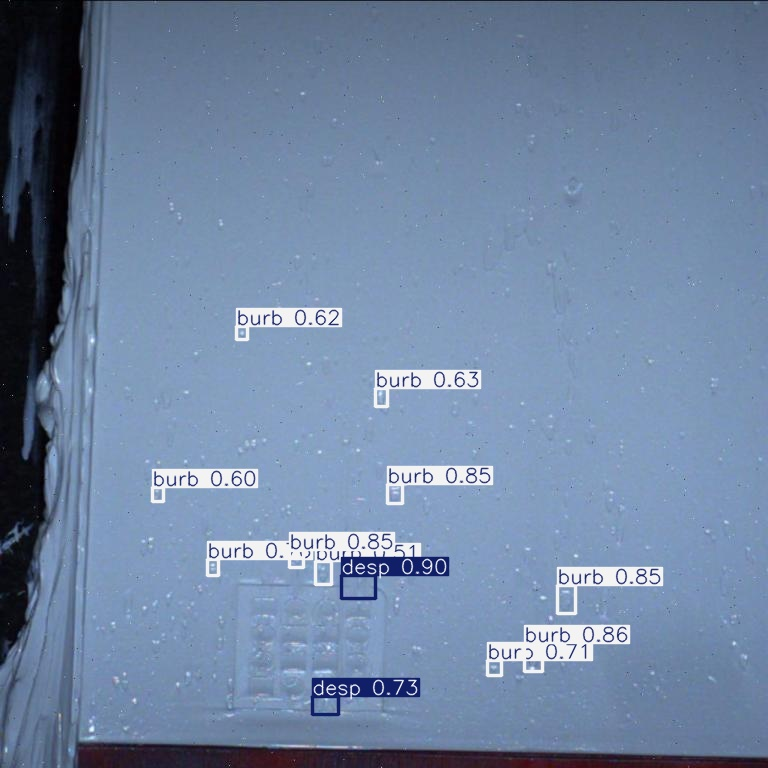

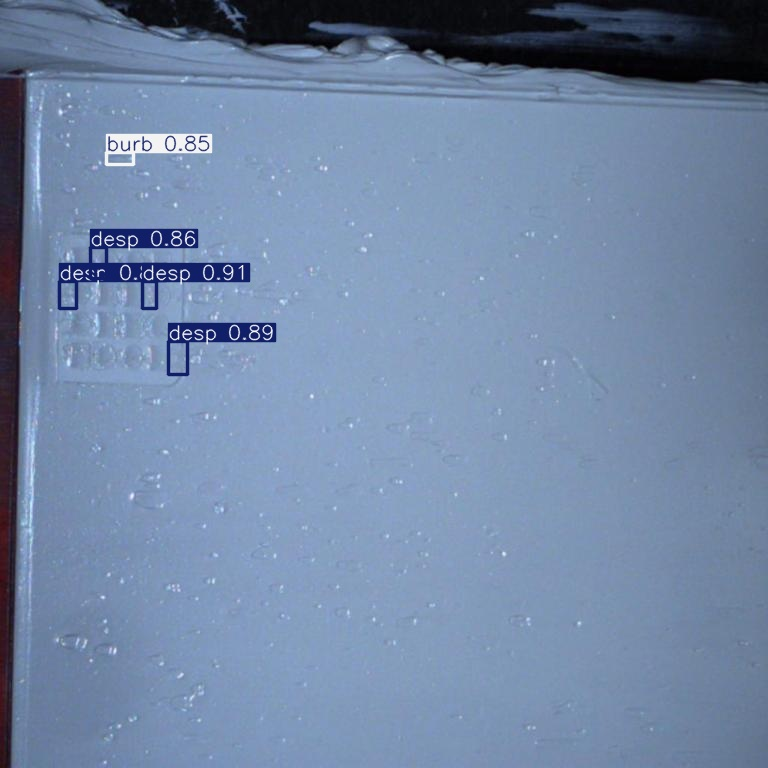

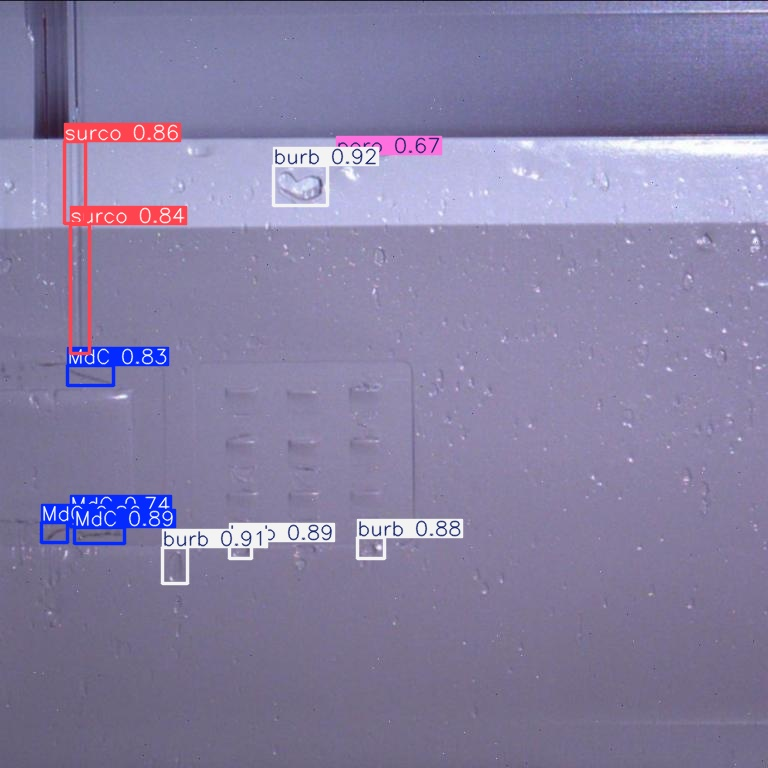

In [11]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict/*.jpg'):
    display(Image(filename=image_path, width=600))
    print("\n")

In [25]:
from google.colab import files
files.download("/content/runs/detect/train/weights/best.pt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
# =========================================================
# 0) DEPENDENCIAS
# =========================================================
!pip -q install ultralytics pycocotools

import os, json, numpy as np
from tqdm import tqdm
from ultralytics import YOLO
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval


In [13]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="lX9sE2RPQOCv2R7cn0io")
project = rf.workspace("jota22").project("vdssdvsdv")
version = project.version(1)
dataset = version.download("coco")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to vdssdvsdv-1 in coco:: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 569/569 [00:00<00:00, 6556.16it/s]


In [23]:
# =========================================================
# 1) RUTAS / PAR√ÅMETROS
# =========================================================
MODEL_PATH     = "/content/runs/detect/train/weights/best.pt"   # <-- tu modelo YOLO
IMG_DIR        = "/content/vdssdvsdv-1/valid"            # <-- im√°genes VAL
GT_COCO_JSON   = "/content/_annotations.coco.cleaned.json"      # <-- GT COCO
PRED_COCO_JSON = "/content/yolo_preds_coco_AP50.json"           # <-- salida preds

CONF_THRES     = 0.30     # umbral de confianza (aj√∫stalo si quieres)
IOU_THRES      = 0.50     # evaluamos SOLO IoU=0.50
MAX_DETS       = 300      # similar a Ultralytics


In [17]:
# =========================================================
# 2) CARGAR MODELO YOLO y CHEQUEAR CLASES
# =========================================================
model = YOLO(MODEL_PATH)
yolo_names = model.model.names  # dict: {cls_idx: "class_name"}
print("Clases YOLO:", yolo_names)

coco_gt = COCO(GT_COCO_JSON)
coco_classes = [c['name'] for c in coco_gt.loadCats(coco_gt.getCatIds())]
print("Clases COCO (GT):", coco_classes)

# Mapeo YOLO -> COCO por nombre (aseg√∫rate de que los nombres coinciden)
name_to_coco_id = {c['name']: c['id'] for c in coco_gt.loadCats(coco_gt.getCatIds())}
yolo_to_coco = {}
missing = []
for idx, name in yolo_names.items():
    if name in name_to_coco_id:
        yolo_to_coco[idx] = name_to_coco_id[name]
    else:
        missing.append(name)

if missing:
    raise ValueError(f"Las siguientes clases de YOLO no est√°n en COCO GT: {missing}")
print("Mapa YOLO->COCO:", yolo_to_coco)

Clases YOLO: {0: 'MdC', 1: 'bbg', 2: 'burb', 3: 'defectos', 4: 'desp', 5: 'poro', 6: 'surco'}
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Clases COCO (GT): ['defectos', 'MdC', 'bbg', 'burb', 'defectos', 'desp', 'poro', 'surco']
Mapa YOLO->COCO: {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7}


In [18]:
# ========= CONFIG =========
IN_JSON  = "/content/vdssdvsdv-1/valid/_annotations.coco.json"          # <-- tu GT original
OUT_JSON = "/content/_annotations.coco.cleaned.json"  # <-- salida limpia

import json, os
from collections import defaultdict

def load_json(p):
    with open(p, "r", encoding="utf-8") as f:
        return json.load(f)

def save_json(obj, p):
    with open(p, "w", encoding="utf-8") as f:
        json.dump(obj, f, ensure_ascii=False)

data = load_json(IN_JSON)

cats = data.get("categories", [])
anns = data.get("annotations", [])
imgs = data.get("images", [])

print(f"üì¶ Cargado: {IN_JSON}")
print(f" - im√°genes:    {len(imgs)}")
print(f" - anotaciones: {len(anns)}")
print(f" - categor√≠as:  {len(cats)}")

# 1) Detectar duplicados por nombre
name_to_ids = defaultdict(list)
for c in cats:
    name_to_ids[c["name"]].append(c["id"])

dupes = {name: ids for name, ids in name_to_ids.items() if len(ids) > 1}
if not dupes:
    print("‚úÖ No hay categor√≠as duplicadas por nombre. (Nada que limpiar)")
    print(f"Guardando copia id√©ntica en: {OUT_JSON}")
    save_json(data, OUT_JSON)
else:
    print("‚ö†Ô∏è Encontradas categor√≠as duplicadas (nombre -> ids):")
    for n, ids in dupes.items():
        print(f"   - {n}: {sorted(ids)}")

    # 2) Plan de fusi√≥n: conservar la ID m√≠nima por cada nombre
    remap = {}   # old_id -> keep_id
    keep_ids = set()
    drop_ids = set()
    for name, ids in dupes.items():
        keep = min(ids)            # conserva la m√°s peque√±a
        keep_ids.add(keep)
        for cid in ids:
            if cid != keep:
                remap[cid] = keep
                drop_ids.add(cid)

    print("\nüîÅ Remapeos (old_id -> keep_id):")
    for old, new in sorted(remap.items()):
        print(f"   {old} -> {new}")

    # 3) Remapear anotaciones
    changed = 0
    for a in anns:
        cid = a["category_id"]
        if cid in remap:
            a["category_id"] = remap[cid]
            changed += 1
    print(f"\n‚úçÔ∏è  Anotaciones actualizadas: {changed}")

    # 4) Eliminar categor√≠as duplicadas del listado
    cleaned_cats = [c for c in cats if c["id"] not in drop_ids]

    # (opcional) Ordenar por id para que quede prolijo
    cleaned_cats = sorted(cleaned_cats, key=lambda c: c["id"])

    # 5) Persistir
    data["categories"]  = cleaned_cats
    data["annotations"] = anns  # ya remapeadas

    save_json(data, OUT_JSON)

    print(f"\n‚úÖ Limpieza completa. Guardado en: {OUT_JSON}")
    print(f" - categor√≠as antes: {len(cats)}  | despu√©s: {len(cleaned_cats)}")
    print(f" - ids eliminadas: {sorted(drop_ids)}")

# 6) Verificaci√≥n r√°pida: intentar cargar con pycocotools
try:
    from pycocotools.coco import COCO
    coco = COCO(OUT_JSON)
    cat_names = [c["name"] for c in coco.loadCats(coco.getCatIds())]
    print("\nüîç Verificaci√≥n COCO (OK):", cat_names)
except Exception as e:
    print("\n‚ùå Verificaci√≥n COCO fall√≥:", e)


üì¶ Cargado: /content/vdssdvsdv-1/valid/_annotations.coco.json
 - im√°genes:    46
 - anotaciones: 661
 - categor√≠as:  8
‚ö†Ô∏è Encontradas categor√≠as duplicadas (nombre -> ids):
   - defectos: [0, 4]

üîÅ Remapeos (old_id -> keep_id):
   4 -> 0

‚úçÔ∏è  Anotaciones actualizadas: 0

‚úÖ Limpieza completa. Guardado en: /content/_annotations.coco.cleaned.json
 - categor√≠as antes: 8  | despu√©s: 7
 - ids eliminadas: [4]
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

üîç Verificaci√≥n COCO (OK): ['defectos', 'MdC', 'bbg', 'burb', 'desp', 'poro', 'surco']


In [24]:
# =========================================================
# 3) INFERENCIA y CONVERSI√ìN A COCO (xywh)
# =========================================================
img_paths = [os.path.join(IMG_DIR, f)
             for f in os.listdir(IMG_DIR) if f.lower().endswith(('.jpg','.jpeg','.png'))]

# Necesitamos image_id exacto del JSON COCO (por file_name)
file2id = {im['file_name']: im['id'] for im in coco_gt.dataset['images']}

def coco_xywh(xyxy):
    x1, y1, x2, y2 = xyxy
    return [float(x1), float(y1), float(x2 - x1), float(y2 - y1)]

coco_preds = []
for p in tqdm(img_paths, desc="Inferencia"):
    file_name = os.path.basename(p)
    if file_name not in file2id:
        # Roboflow a veces reescribe nombres; si pasa, avisa aqu√≠
        print(f"[AVISO] {file_name} no est√° en el JSON GT. Saltando‚Ä¶")
        continue
    image_id = file2id[file_name]

    res = model.predict(p, conf=CONF_THRES, verbose=False)[0]  # ya filtra por conf
    boxes = res.boxes
    if boxes is None or len(boxes) == 0:
        continue

    for i in range(len(boxes)):
        cls_idx = int(boxes.cls[i])
        conf    = float(boxes.conf[i])
        if conf < CONF_THRES:
            continue
        xyxy = boxes.xyxy[i].tolist()
        coco_preds.append({
            "image_id": image_id,
            "category_id": int(yolo_to_coco[cls_idx]),
            "bbox": coco_xywh(xyxy),
            "score": conf
        })

with open(PRED_COCO_JSON, "w") as f:
    json.dump(coco_preds, f)
print(f"‚úÖ Predicciones guardadas en COCO: {PRED_COCO_JSON}  ({len(coco_preds)} detecciones)")

Inferencia: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 46/46 [00:03<00:00, 12.76it/s]

‚úÖ Predicciones guardadas en COCO: /content/yolo_preds_coco_AP50.json  (567 detecciones)


In [26]:
# =========================================================
# 4) EVALUACI√ìN COCOeval ‚ÄúESTILO YOLO‚Äù (AP @ IoU=0.50, maxDets=300)
# =========================================================
coco_dt  = coco_gt.loadRes(PRED_COCO_JSON)

e = COCOeval(coco_gt, coco_dt, iouType='bbox')
# Configurar EXACTAMENTE IoU=0.50 y maxDets=300
e.params.imgIds  = coco_gt.getImgIds()
e.params.catIds  = coco_gt.getCatIds()
e.params.iouThrs = np.array([IOU_THRES])    # solo un IoU
e.params.maxDets = [MAX_DETS]              # un √∫nico tope de detecciones
# Usamos √°rea 'all' (como YOLO)
e.params.areaRng = [[0**2, 1e5**2]]
e.params.areaRngLbl = ['all']

e.evaluate()
e.accumulate()
# No uses summarize() est√°ndar porque asume los 12 m√©tricos; hacemos lectura manual:
# e.eval['precision'] dims: T x R x K x A x M -> con T=1, A=1, M=1 ahora
prec = e.eval['precision']  # shape (1, R, K, 1, 1)
rec  = e.eval['recall']     # shape (1, K, 1, 1)

# AP50 global (promedio sobre clases y recalls v√°lidos)
ap50 = np.mean(prec[0, prec[0] > -1]) if np.any(prec[0] > -1) else float('nan')
# AR@maxDets global
ar   = np.mean(rec[0, rec[0] > -1])   if np.any(rec[0] > -1)   else float('nan')

print("\n========== Resultados estilo YOLO (COCOeval) ==========")
print(f"AP50 (IoU=0.50, maxDets={MAX_DETS}): {ap50:.3f}")
print(f"AR   (IoU=0.50, maxDets={MAX_DETS}): {ar:.3f}")

# AP50 por clase (opcional)
catIds = e.params.catIds
catId2name = {c['id']: c['name'] for c in coco_gt.loadCats(catIds)}
print("\nAP50 por clase:")
for k, catId in enumerate(catIds):
    p = prec[0, :, k, 0, 0]
    p = p[p > -1]
    ap_k = p.mean() if p.size else float('nan')
    print(f"  - {catId2name[catId]:<10s}: {ap_k:.3f}")


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.00s).

========== Resultados estilo YOLO (COCOeval) ==========
AP50 (IoU=0.50, maxDets=300): 0.611
AR   (IoU=0.50, maxDets=300): 0.644

AP50 por clase:
  - defectos  : nan
  - MdC       : 0.751
  - bbg       : 0.725
  - burb      : 0.619
  - defectos  : nan
  - desp      : 0.648
  - poro      : 0.543
  - surco     : 0.377


In [27]:
# =========================
# 3) EJECUTAR PREDICCIONES
# =========================
# Recolectar rutas de im√°genes tal cual est√°n en IMG_DIR
img_paths = [os.path.join(IMG_DIR, f)
             for f in os.listdir(IMG_DIR)
             if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

coco_results = []

# Utilizamos stream=True para no cargar todas las im√°genes en memoria
for result in tqdm(model.predict(img_paths, stream=True, verbose=False), total=len(img_paths)):
    # Nombre base del archivo (deber√≠a coincidir con file_name en el JSON COCO)
    base = os.path.basename(result.path)
    if base not in fn_to_imgid:
        # Si el file_name en el JSON no incluye carpetas, esto funcionar√°.
        # Si no hay coincidencia, avisamos y saltamos.
        print(f"‚ö†Ô∏è  No se encontr√≥ image_id para '{base}'. Se omite.")
        continue
    image_id = fn_to_imgid[base]

    # Dimensiones (para recortar cajas, por si el modelo sale de l√≠mites)
    h, w = result.orig_shape

    boxes = result.boxes
    if boxes is None or len(boxes) == 0:
        continue

    # Para cada predicci√≥n
    xyxy = boxes.xyxy.cpu().numpy()           # [N, 4] en p√≠xeles
    cls   = boxes.cls.cpu().numpy().astype(int)
    conf  = boxes.conf.cpu().numpy()

    for (x1, y1, x2, y2), c, s in zip(xyxy, cls, conf):
        # nombre de clase desde YOLO
        cls_name = yolo_names.get(int(c), None)
        if cls_name is None:
            continue
        # mapear a category_id de COCO por nombre
        if cls_name not in name_to_catid:
            # Clase del modelo no existe en el JSON COCO ‚Üí omitir
            continue
        category_id = name_to_catid[cls_name]

        # xyxy -> xywh, recortando a l√≠mites de la imagen
        x1 = max(0.0, min(float(x1), w - 1))
        y1 = max(0.0, min(float(y1), h - 1))
        x2 = max(0.0, min(float(x2), w - 1))
        y2 = max(0.0, min(float(y2), h - 1))
        bw = max(0.0, x2 - x1)
        bh = max(0.0, y2 - y1)
        if bw <= 0 or bh <= 0:
            continue

        coco_results.append({
            "image_id": int(image_id),
            "category_id": int(category_id),
            "bbox": [x1, y1, bw, bh],  # COCO: [x, y, width, height]
            "score": float(s)
        })

# Guardar predicciones
with open(PRED_COCO_JSON, "w") as f:
    json.dump(coco_results, f)
print(f"‚úÖ Predicciones COCO guardadas en: {PRED_COCO_JSON} (total: {len(coco_results)})")

  0%|          | 0/46 [00:02<?, ?it/s]


NameError: name 'fn_to_imgid' is not defined

In [29]:
 #4) EVALUAR CON COCOeval
# =========================
coco_dt = coco_gt.loadRes(PRED_COCO_JSON)

coco_eval = COCOeval(coco_gt, coco_dt, iouType="bbox")
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()

# La m√©trica clave comparable a Ultralytics:
# - mAP@0.50  ‚âà coco_eval.stats[1]
# - mAP@0.50:0.95 ‚âà coco_eval.stats[0]
print({
    "mAP50-95": coco_eval.stats[0],
    "mAP50": coco_eval.stats[1]
})

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.11s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.381
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.611
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.421
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.373
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.640
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.142
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.425
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.431
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1